# Analysing the host information including;age, location,gender and status for the possible prediction of outcome of recovery vs Death

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [3]:
# iterating the columns 
for col in data.columns: 
    print(col) 

record_date
virus_name
accession_id
type
lineage
passage_details_history
collection_date
location
host
additional_location_info
gender
age
status
specimen_source
additional_host_information
outbreak
last_vaccinated
treatment
sequencing_technology
assembly_method
coverage
comment
originating_lab
originating_lab_address
sample_id_given_by_sample_provider
submitting_lab
submitting_lab_address
sample_id_given_by_submitting_lab
authors
submitter
submission_date
submitter_address
Query
Strand
%N
Length(nt)
Length(aa)
#Muts
%Muts
#UniqueMuts
%UniqueMuts
#ExistingMuts
%ExistingMuts
Comment
Symbol
Reference
UniqueMutList
ExistingMutList
Clade
IfExistSpecialChar


# Preprocessing and cleaning the data

In [4]:
#important features
start_data_row = 76
Final_data_row = 255
Data = data.loc[ start_data_row:Final_data_row , ['status','%N','Length(nt)','Length(aa)',
                                                   '%Muts','%UniqueMuts','%ExistingMuts','ExistingMutList','Clade']]
#change the index of the data according to the length of the new data
Data.index = range(len(Data))

In [5]:
#removing the % from the data
Data['%N'] = Data['%N'].str.replace('%', ' ') 
Data['%Muts'] = Data['%Muts'].str.replace('%', ' ') 
Data['%UniqueMuts'] = Data['%UniqueMuts'].str.replace('%', ' ') 
Data['%ExistingMuts'] = Data['%ExistingMuts'].str.replace('%', ' ') 
Data['%N'].astype(float)
Data['%Muts'].astype(float)
Data['%UniqueMuts'].astype(float)
Data['%ExistingMuts'].astype(float)

0      0.04
1      0.05
2      0.13
3      0.03
4      0.03
       ... 
173    0.04
174    0.05
175    0.05
176    0.05
177    0.01
Name: %ExistingMuts, Length: 178, dtype: float64

In [6]:
#getting rid of NaN data
Data.dropna(subset = ['status'], inplace=True)
Data.dropna(subset = ['ExistingMutList'], inplace=True)
Data.index = range(len(Data))

In [7]:
#chacking if there is any null data in ExistingMutList
for i in range(len(Data)):
    if pd.isnull(Data.ExistingMutList[i]) is True:
        print('True')

In [8]:
#getting rid of NaN data
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)

In [9]:
#Labeling
Data.replace(['Deceased'],value= [1], inplace=True)
Data.status[Data['status'] != 1]=0

C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#using dummies instead of location data for ML input
Data_model = pd.concat([pd.get_dummies(Data[['ExistingMutList']]),pd.get_dummies(Data[['Clade']]), Data[['status','%N','Length(nt)','Length(aa)',
                                                   '%Muts','%UniqueMuts']]], axis=1)
Data_model.head()

,"ExistingMutList_(NS3_A23V,NS3_G251V)",ExistingMutList_(NS3_G251V),ExistingMutList_(NS8_L84S),ExistingMutList_(NSP12_P323L),"ExistingMutList_(NSP12_P323L,NS8_L84S)","ExistingMutList_(NSP12_P323L,NSP12_A185V,Spike_D614G)","ExistingMutList_(NSP12_P323L,NSP12_A449V,Spike_D614G,N_G204R,N_R203K)","ExistingMutList_(NSP12_P323L,NSP12_T252N,Spike_D614G)","ExistingMutList_(NSP12_P323L,NSP12_T26I,Spike_D614G,M_D3G)","ExistingMutList_(NSP12_P323L,NSP12_V880I,Spike_D614G,Spike_E583D,NS3_Q57H,N_S194L)",...,Clade_G,Clade_Other,Clade_S,Clade_V,status,%N,Length(nt),Length(aa),%Muts,%UniqueMuts
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29890.0,9710.0,0.04,0.00
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29849.0,9710.0,0.05,0.00
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2.41,29899.0,9685.0,0.19,0.05
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29845.0,9710.0,0.04,0.01
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29834.0,9710.0,0.03,0.00


In [11]:
#checking the balance in the data
Data_model['status'].value_counts()

0    137
1     32
Name: status, dtype: int64

In [12]:
#Separating target (label) data
X = Data_model.drop('status',axis=1).astype(float)
y = Data_model.status
y=y.astype(int)
y.value_counts()


0    137
1     32
Name: status, dtype: int64

### Scaling the data

In [13]:
# Scaling the data to standarize them
#Here caling reduced the iteration number from 200 to 50
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
#sc = MinMaxScaler()
sc.fit(X)
X_scaled = sc.transform(X)
X_normal_scaled = X_scaled[y == 0] 
X_deseased_scaled = X_scaled[y == 1] 

In [14]:
## Simple feedforward autoencoder

import keras
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Input, Dense

window_length = 115
encoding_dim = 7
epochs = 300

X_simple = X.values.reshape((len(X), np.prod(X.shape[1:])))

# this is our input placeholder
input_window = Input(shape=(window_length,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_window)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(window_length, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_window, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_window, encoded)


autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(X_normal_scaled, X_normal_scaled,
                epochs=epochs,
                batch_size=1024,
                shuffle=True,
                validation_split = 0.20)

# Separating the points encoded by the Auto-encoder as normal and fraud 
decoded_X_normal = autoencoder.predict(X_normal_scaled)
decoded_X_deseased = autoencoder.predict(X_deseased_scaled)
# Combining the encoded points into a single table  
encoded_X = np.append(decoded_X_normal, decoded_X_deseased, axis = 0) 
y_normal = np.zeros(decoded_X_normal.shape[0]) 
y_deceased = np.ones(decoded_X_deseased.shape[0]) 
encoded_y = np.append(y_normal, y_deceased) 


Using TensorFlow backend.
C:\Users\Azadeh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Azadeh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Azadeh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Azadeh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 115)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 812       
_________________________________________________________________
dense_2 (Dense)              (None, 115)               920       
Total params: 1,732
Trainable params: 1,732
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 109 samples, validate on 28 samples
Epoch 1/300
109/109 [==============================] - 0s 1ms/step - loss: 0.7149 - val_loss: 0.7071
Epoch 2/300
109/109 [==============================] - 0s 37us/step - loss: 0.7118 - val_loss: 0.7051
Epoch 3/300
109/109

Epoch 68/300
109/109 [==============================] - 0s 37us/step - loss: 0.4952 - val_loss: 0.5568
Epoch 69/300
109/109 [==============================] - 0s 55us/step - loss: 0.4909 - val_loss: 0.5545
Epoch 70/300
109/109 [==============================] - 0s 36us/step - loss: 0.4866 - val_loss: 0.5522
Epoch 71/300
109/109 [==============================] - 0s 46us/step - loss: 0.4822 - val_loss: 0.5499
Epoch 72/300
109/109 [==============================] - 0s 83us/step - loss: 0.4778 - val_loss: 0.5476
Epoch 73/300
109/109 [==============================] - 0s 37us/step - loss: 0.4734 - val_loss: 0.5453
Epoch 74/300
109/109 [==============================] - 0s 37us/step - loss: 0.4690 - val_loss: 0.5430
Epoch 75/300
109/109 [==============================] - 0s 82us/step - loss: 0.4646 - val_loss: 0.5407
Epoch 76/300
109/109 [==============================] - 0s 27us/step - loss: 0.4601 - val_loss: 0.5385
Epoch 77/300
109/109 [==============================] - 0s 110us/step - l

Epoch 147/300
109/109 [==============================] - 0s 73us/step - loss: 0.1373 - val_loss: 0.4053
Epoch 148/300
109/109 [==============================] - 0s 46us/step - loss: 0.1331 - val_loss: 0.4040
Epoch 149/300
109/109 [==============================] - 0s 64us/step - loss: 0.1290 - val_loss: 0.4027
Epoch 150/300
109/109 [==============================] - 0s 37us/step - loss: 0.1248 - val_loss: 0.4014
Epoch 151/300
109/109 [==============================] - 0s 37us/step - loss: 0.1207 - val_loss: 0.4001
Epoch 152/300
109/109 [==============================] - 0s 27us/step - loss: 0.1166 - val_loss: 0.3989
Epoch 153/300
109/109 [==============================] - 0s 55us/step - loss: 0.1125 - val_loss: 0.3976
Epoch 154/300
109/109 [==============================] - 0s 37us/step - loss: 0.1084 - val_loss: 0.3964
Epoch 155/300
109/109 [==============================] - 0s 37us/step - loss: 0.1044 - val_loss: 0.3952
Epoch 156/300
109/109 [==============================] - 0s 27us

Epoch 226/300
109/109 [==============================] - 0s 37us/step - loss: -0.1645 - val_loss: 0.3309
Epoch 227/300
109/109 [==============================] - 0s 37us/step - loss: -0.1682 - val_loss: 0.3302
Epoch 228/300
109/109 [==============================] - 0s 37us/step - loss: -0.1718 - val_loss: 0.3295
Epoch 229/300
109/109 [==============================] - 0s 37us/step - loss: -0.1756 - val_loss: 0.3287
Epoch 230/300
109/109 [==============================] - 0s 64us/step - loss: -0.1792 - val_loss: 0.3280
Epoch 231/300
109/109 [==============================] - 0s 64us/step - loss: -0.1829 - val_loss: 0.3273
Epoch 232/300
109/109 [==============================] - 0s 46us/step - loss: -0.1866 - val_loss: 0.3265
Epoch 233/300
109/109 [==============================] - 0s 55us/step - loss: -0.1903 - val_loss: 0.3258
Epoch 234/300
109/109 [==============================] - 0s 91us/step - loss: -0.1939 - val_loss: 0.3251
Epoch 235/300
109/109 [==============================] 

In [15]:
#splitting features and the label: 20% test data and 80% assigned to training data
# split into train/test sets with same class ratio
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

### Balancing the data

In [16]:
#balancing the data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
over = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train, y_train = over.fit_resample(X_train, y_train)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)


C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed

# Random Forest

In [17]:
#fitting the model and get the conversion probabilities. 
#predit_proba() function of our model assigns probability for each row:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=30,max_depth = 60, max_features = 'log2')
# Fit on training data
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
RF_probs = model.predict_proba(X_test)[:,1]
#Return the mean accuracy on the given test data and taraining data to see if we have overfitting.score clculates R^2
print('R^2 _train=',model.score(X_train, y_train))
print('R^2 _test=',model.score(X_test, y_test))

R^2 _train= 0.9908256880733946
R^2 _test= 0.9411764705882353


### Cross validation 

In [18]:
#Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
print('CV-scores_min = ',scores.min())
print('CV_scores_mean =', scores.mean())
print('CV_scores_max =', scores.max())

Cross-Validation Accuracy Scores [1.         1.         1.         0.95454545 0.90909091 0.95454545
 0.95454545 1.         1.         0.95238095]
CV-scores_min =  0.9090909090909091
CV_scores_mean = 0.9725108225108225
CV_scores_max = 1.0


In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df.head(25)

,Actual,Predicted
113,1,0
1,0,0
91,0,0
77,1,1
28,0,0
51,0,0
153,1,1
127,0,0
95,0,0
151,1,1


### Performance measurement metrics

In [20]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

Mean Absolute Error: 0.058823529411764705
Mean Squared Error: 0.058823529411764705
Root Mean Squared Error: 0.24253562503633297


In [21]:
#Area Under ROC Curve (AUROC) metric
from sklearn.metrics import roc_auc_score
# Keep only the positive class
#lr_probs = [p[1] for p in lr_probs]
print( 'roc_auc =', roc_auc_score(y_test, RF_probs) )

roc_auc = 0.9404761904761905


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.940


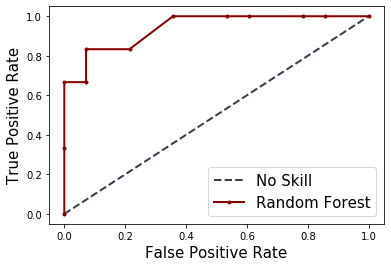

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
RF_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
RF_probs = RF_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (RF_auc))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',  linewidth=2,  color = '#333F4B')
pyplot.plot(RF_fpr, RF_tpr, marker='.', label='Random Forest', linewidth=2, color = 'darkred')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=15)
pyplot.ylabel('True Positive Rate',fontsize=15)
# show the legend
pyplot.legend(fontsize=15)
# show the plot
pyplot.show()